In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement1.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [3]:
df.shape

(1000, 3)

In [4]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

In [5]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


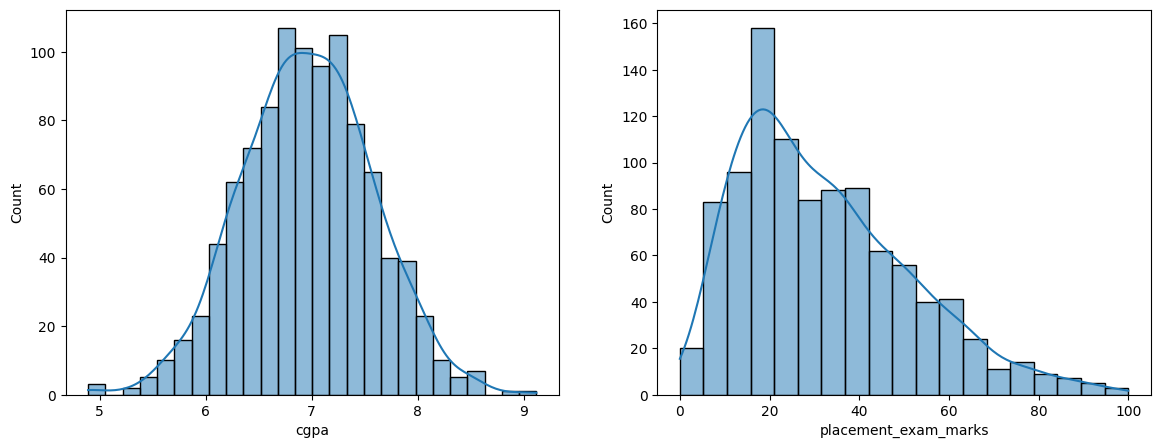

In [6]:
plt.figure(figsize=(14,5))

plt.subplot(121)
sns.histplot(df['cgpa'], kde=True)

plt.subplot(122)
sns.histplot(df['placement_exam_marks'], kde=True)

plt.show()

In [7]:
#Finding the boundaries value

high = df['cgpa'].mean() + 3*df['cgpa'].std()
low = df['cgpa'].mean() - 3*df['cgpa'].std()

high, low

(8.808933625397168, 5.113546374602832)

In [8]:
#Finding the outliers

df_outliers = df[(df['cgpa']>high)|(df['cgpa']<low)]
df_outliers

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [9]:
df_outliers.shape

(5, 3)

Trimming

In trimming, we basically remove the outliers.

In [10]:
df_new = df[(df['cgpa']<high)&(df['cgpa']>low)]
df_new

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


Above, there are 995 rows in df_new since, we have 5 outliers. As seen from df_outliers

Capping

In capping, we basically set the right outlier data to the highest value and the left outlier to the lowest value.

np.where(x,y,z)  <-----  here, x is the condtion, y is the value if condition satisfied and z is the value if it didn't

In [11]:
df['cgpa'] = np.where(
    df['cgpa']>high,
    high,
    np.where(
        df['cgpa']<low,
        low,
        df['cgpa']
    )
)

In [12]:
df.shape

(1000, 3)

In [13]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961499,32.225000,0.489000
std,0.612688,19.130822,0.500129
min,5.113546,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,8.808934,100.000000,1.000000


For CGPA, we had the data normalized, therefore we used the above defined method but, when we talk about the placement marks column, we see that it wwas skewed actually. Therefore, we have some another method for it.

<Axes: >

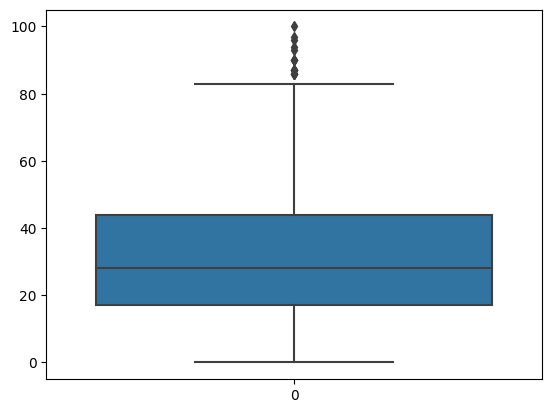

In [14]:
sns.boxplot(df['placement_exam_marks'])

In [15]:
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

27.0

In [16]:
upperLimit = percentile75 + 1.5*iqr
lowerLimit = percentile25 - 1.5*iqr

In [17]:
new_df = df[df['placement_exam_marks'] < upperLimit]
new_df.shape

(985, 3)

Here, after trimming we see that the newdf has a size of 985 that means we had 15 outliers.

Therefore, we will cap the data and not trim the data.

In [18]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upperLimit,
    upperLimit,
    np.where(
        new_df_cap['placement_exam_marks'] < lowerLimit,
        lowerLimit,
        new_df_cap['placement_exam_marks']
    )
)

for normalized data we can also use percentile method to remove outliers, if outliers are on the both side.
https://youtu.be/bcXA4CqRXvM?si=FY429YcQadQgS9YJ <-- link to the video